# Team 5 : Term Project Proposal
|Major|Student Number|Name|
|:---|:---|:---|
|Software major|201033093|Go junho|
|Software major|201533636|Kim seungho|
|Software major|201937913|Park yejin
|Industrial Engineering|201834707|Kim mingeol|

### Data Explanation
<p> The income dataset is a dataset representing income for various topics. <br>At this time, there is an item called 'target' in the column, which has a binary value. A value of 0 means that you have an income of less than  $500,000, and a value of 1 means that you have more than that. <br>It is a data set that can predict income by age, work class, education level, marital status, occupation, family relations, race, sex, hours.per.week, and nationality.</p>

### Data Source
https://dacon.io/competitions/official/235892/data

# Data Objective
<p>The purpose of the program is to predict the target(=income) by clustering each value with a given column (age, work class, education level, marital status, occupation, family relations, race, sex, hours.per.week, and nationality).<br>
It is also the purpose of the program to find the column most related to income.</p>

### Data Description

|Column|Describe|
|:---|:----|
|id|Sample ID|
|age|About age|
|workclass | Type of work 
|fnlwgt | CPS(Current Population Survey) Weight
|education |Education level 
|education.num | Education level number
|marital.status | Married or not
|occupation | Data on job types
|relationship | Data on family relationships
|sex | Data on gender
|capital.gain | Profits from the acquisition and transfer of assets of a capital nature
|capital.loss | Losses caused by the acquisition and transfer of assets of a capital nature
|hours.per.week | Data on how many hours worked per week
|native.country | Data on nationality
|target | Incom
|		| 0 = <=50K (Less than 50,000 dollars)|
|       | 1 = >50K (More than 50,000 dollars)| 

# Data Inspection

#### Data info

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Print

In [3]:
train = pd.read_csv("train.csv")
train

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17475,17475,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,1
17476,17476,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
17477,17477,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,1
17478,17478,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,0


### Data Head

In [4]:
train.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0


### Data describe

In [5]:
train.describe()

,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,target
count,17480.000000,17480.000000,1.748000e+04,17480.000000,17480.000000,17480.00000,17480.000000,17480.000000
mean,8739.500000,38.720995,1.897610e+05,10.036556,1076.644508,83.87460,40.002460,0.234897
std,5046.185688,14.079617,1.049929e+05,2.604415,7439.498620,396.03288,12.671265,0.423947
min,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.00000,1.000000,0.000000
25%,4369.750000,27.000000,1.181558e+05,9.000000,0.000000,0.00000,38.000000,0.000000
50%,8739.500000,37.000000,1.781340e+05,10.000000,0.000000,0.00000,40.000000,0.000000
75%,13109.250000,48.000000,2.373180e+05,12.000000,0.000000,0.00000,45.000000,0.000000
max,17479.000000,90.000000,1.455435e+06,16.000000,99999.000000,4356.00000,99.000000,1.000000


### Data shape

In [6]:
train.shape

(17480, 16)

### Data columns values

In [7]:
train.columns.values### Data describe

array(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'target'], dtype=object)

### Data information

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17480 entries, 0 to 17479
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              17480 non-null  int64 
 1   age             17480 non-null  int64 
 2   workclass       15644 non-null  object
 3   fnlwgt          17480 non-null  int64 
 4   education       17480 non-null  object
 5   education.num   17480 non-null  int64 
 6   marital.status  17480 non-null  object
 7   occupation      15637 non-null  object
 8   relationship    17480 non-null  object
 9   race            17480 non-null  object
 10  sex             17480 non-null  object
 11  capital.gain    17480 non-null  int64 
 12  capital.loss    17480 non-null  int64 
 13  hours.per.week  17480 non-null  int64 
 14  native.country  16897 non-null  object
 15  target          17480 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 2.1+ MB


### Data missing values in columns

In [9]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'Columns with missing values: {col}')
            print(f'There are a total of{missing_values} missing values in that column.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('No missing values')
    return missing_col

missing_col = check_missing_col(train)

Columns with missing values: workclass
There are a total of1836 missing values in that column.
Columns with missing values: occupation
There are a total of1843 missing values in that column.
Columns with missing values: native.country
There are a total of583 missing values in that column.


### Data categorical (workclass column) 

In [10]:
#One type can be classified into 8 types (categorical data)
print(train['workclass'].unique())
print(train['workclass'].value_counts())

['Private' 'State-gov' 'Local-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Federal-gov' 'Without-pay' nan 'Never-worked']
Private             11568
Self-emp-not-inc     1272
Local-gov            1053
State-gov             659
Self-emp-inc          594
Federal-gov           485
Never-worked            7
Without-pay             6
Name: workclass, dtype: int64


### Data categorical (occupation) 

In [11]:
#Occupations can be classified into 14 (categorical data)

print(train['occupation'].unique())
print(train['native.country'].value_counts())

['Craft-repair' 'Exec-managerial' 'Adm-clerical' 'Prof-specialty'
 'Machine-op-inspct' 'Other-service' 'Sales' 'Farming-fishing'
 'Transport-moving' 'Handlers-cleaners' 'Tech-support' 'Protective-serv'
 'Priv-house-serv' 'Armed-Forces' nan]
United-States                 15393
Mexico                          355
Philippines                     108
Germany                          75
Canada                           63
Puerto-Rico                      59
El-Salvador                      58
Cuba                             49
India                            47
England                          46
Jamaica                          42
China                            40
South                            39
Italy                            38
Dominican-Republic               38
Columbia                         37
Guatemala                        36
Poland                           35
Japan                            33
Vietnam                          32
Taiwan                           28
Hai

### Data categorical (native.country) 

In [12]:
# This nationality can be classified into 41 (categorical data)
print(train['native.country'].unique())
print(train['native.country'].value_counts())

['United-States' 'Poland' 'Mexico' 'Ireland' 'Guatemala'
 'Dominican-Republic' 'Greece' 'El-Salvador' 'Portugal' 'Canada'
 'Philippines' 'India' 'Italy' 'England' 'Jamaica' 'Columbia' 'South'
 'Vietnam' 'Cuba' 'Laos' 'Hong' 'Haiti' 'Germany' 'Yugoslavia' 'Ecuador'
 'France' 'Puerto-Rico' 'Outlying-US(Guam-USVI-etc)' 'Taiwan' 'China'
 'Japan' 'Honduras' 'Peru' 'Nicaragua' 'Hungary' 'Cambodia' 'Iran'
 'Trinadad&Tobago' 'Thailand' 'Scotland' 'Holand-Netherlands' nan]
United-States                 15393
Mexico                          355
Philippines                     108
Germany                          75
Canada                           63
Puerto-Rico                      59
El-Salvador                      58
Cuba                             49
India                            47
England                          46
Jamaica                          42
China                            40
South                            39
Italy                            38
Dominican-Republic         

### Check Target Distribution

0    13374
1     4106
Name: target, dtype: int64


<AxesSubplot:ylabel='target'>

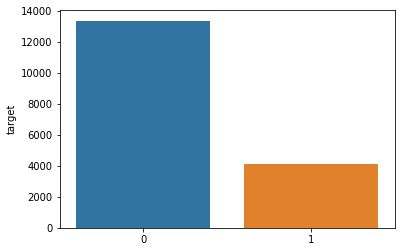

In [13]:
tar_cnt = train['target'].value_counts()
print(tar_cnt)
sns.barplot(x=tar_cnt.index, y=tar_cnt)


### Categorical data analysis

In [14]:
# Create Net Capital Income Column
train['net_cap'] = train['capital.gain'] - train['capital.loss']

In [15]:
# Drop numeric data
train_cat = train.drop(['id', 'age', 'fnlwgt', 'education.num', 'net_cap', 'hours.per.week'], axis=1) 
train_cat.head()

,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,native.country,target
0,Private,Assoc-acdm,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,United-States,0
1,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,United-States,1
2,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,United-States,0
3,Private,Bachelors,Never-married,Adm-clerical,Own-child,White,Female,0,0,United-States,0
4,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,United-States,0


In [16]:
train_cat.describe()

,capital.gain,capital.loss,target
count,17480.000000,17480.00000,17480.000000
mean,1076.644508,83.87460,0.234897
std,7439.498620,396.03288,0.423947
min,0.000000,0.00000,0.000000
25%,0.000000,0.00000,0.000000
50%,0.000000,0.00000,0.000000
75%,0.000000,0.00000,0.000000
max,99999.000000,4356.00000,1.000000


### Numerical data analysis

In [17]:
train_num = train[['age', 'fnlwgt', 'net_cap', 'hours.per.week', 'target']] #수치형 피쳐와 label인 target 추출
train_num.head()

,age,fnlwgt,net_cap,hours.per.week,target
0,32,309513,0,40,0
1,33,205469,0,40,1
2,46,149949,0,40,0
3,23,193090,0,30,0
4,55,60193,0,40,0


In [18]:
train_num.describe()

,age,fnlwgt,net_cap,hours.per.week,target
count,17480.000000,1.748000e+04,17480.000000,17480.000000,17480.000000
mean,38.720995,1.897610e+05,992.769908,40.002460,0.234897
std,14.079617,1.049929e+05,7462.144353,12.671265,0.423947
min,17.000000,1.228500e+04,-4356.000000,1.000000,0.000000
25%,27.000000,1.181558e+05,0.000000,38.000000,0.000000
50%,37.000000,1.781340e+05,0.000000,40.000000,0.000000
75%,48.000000,2.373180e+05,0.000000,45.000000,0.000000
max,90.000000,1.455435e+06,99999.000000,99.000000,1.000000


### Data Visualization

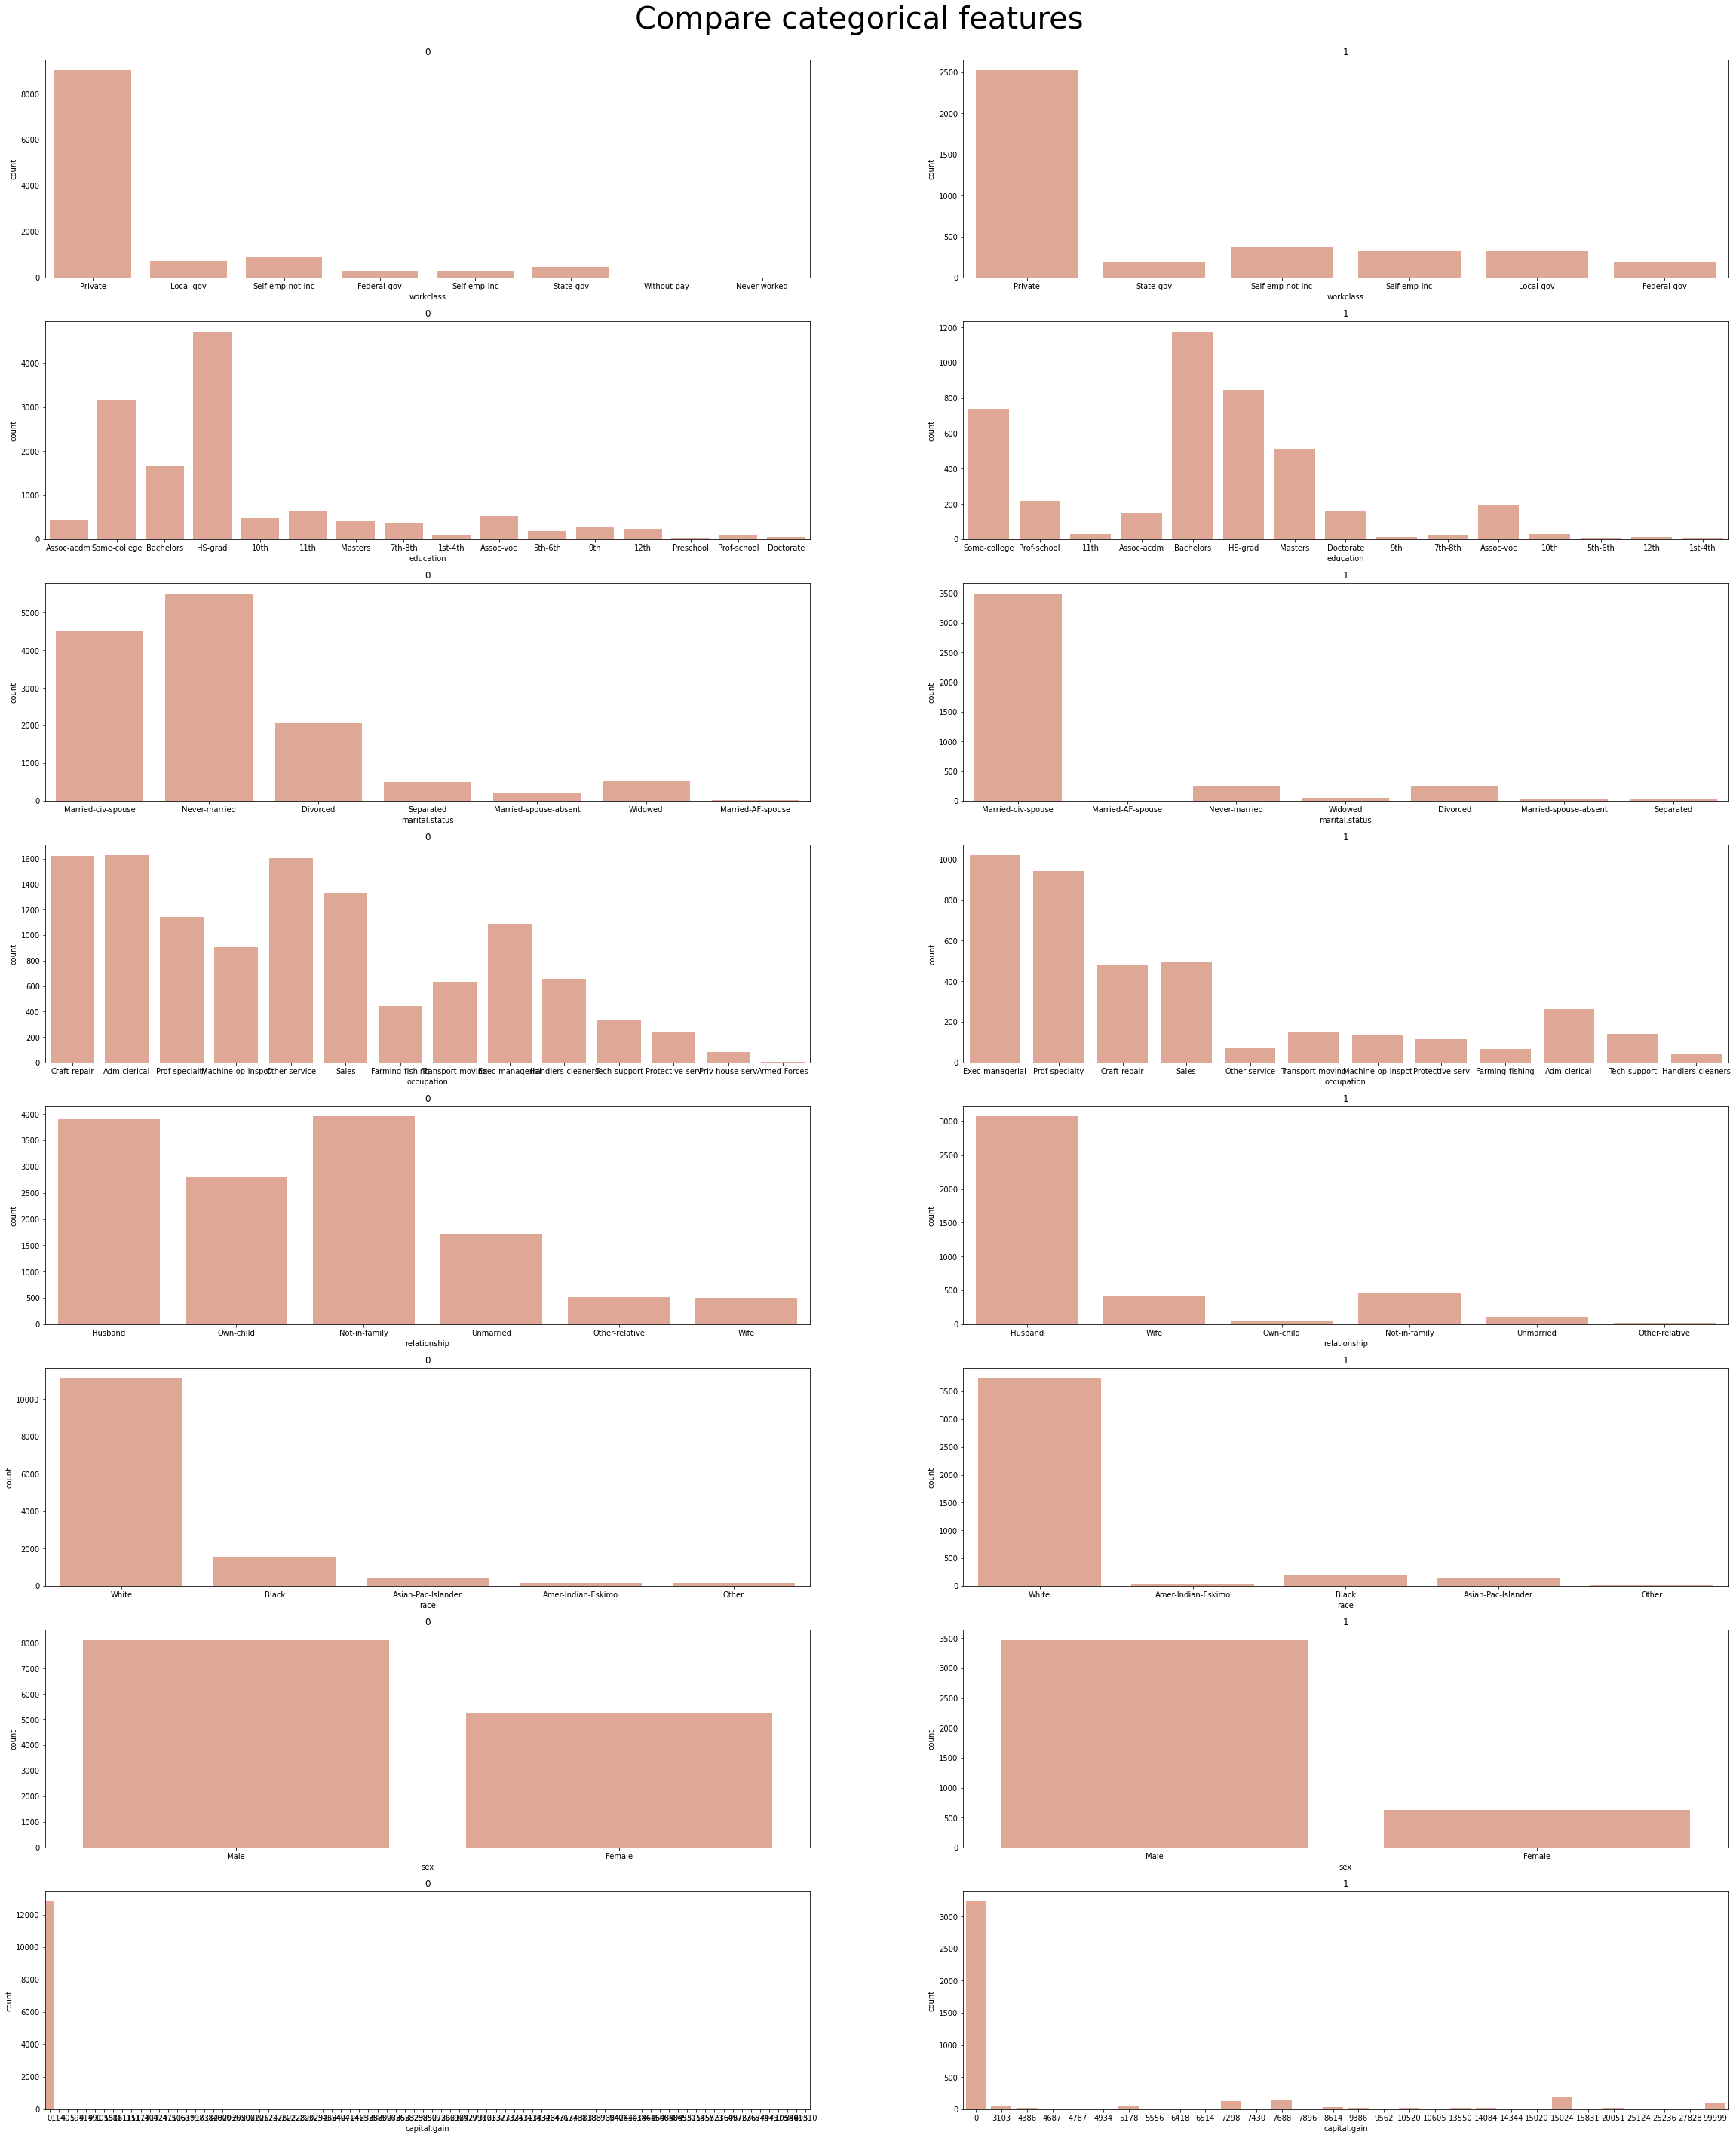

In [19]:
# Categorical data distribution
# 0 is low income 1 is high income
def visualize(axx, field, num):  ##method to draw graph
    sns.countplot(train_cat.columns[num], data= train_cat[train_cat['target'] == field],  color='#eaa18a', ax = axx) # countplot을 이용하여 그래프를 그려줍니다.
    axx.set_title(field)

figure, ((ax1,ax2),(ax3,ax4), (ax5, ax6),(ax7, ax8), (ax9, ax10),
         (ax11,ax12),(ax13,ax14), (ax15, ax16))  = plt.subplots(nrows=8, ncols=2) ## 원하는 개수의 subplots 만들어주기
figure.set_size_inches(40, 50) #(w,h)
figure.suptitle('Compare categorical features', fontsize=40, y = 0.9)

k = 0 # number of features
j = 1 # number of graphs
while k<8: 
    for i in range(0,2):
        visualize(eval(f'ax{j}'), train_cat['target'].unique()[i], k)
        j = j+1
    k = k+1

|Column name|Analysis|
|:---|:---|
|WorkClass|Most of the workers in private enterprises were found in the order of self-employment, local, and provincial government|
|Education|In the case of low-income, high school graduate / junior college / bachelor's degree is the most common<br>In the case of high income, the most in the order of bachelor's / high school / junior colleges<br>--> Proof that education level is related to income to some extent|
|Marital Status|In the case of low income, single / married / divorced in that order<br>In the case of high income, married / divorced / single<br>-->I think it's an indicator that income is an important option in getting married.|
|Occupation|For low income, Adm-clerical / Craft-repair / Other Service 순<br>For high income, Exec-managerial / Prof-specialty / Sales 순<br>-->It is divided into high-paying jobs and low-paying jobs.|
|Relationship|For low income, Husband / Not-in-family / Own-child 순<br>For high income, Husband / Not-in-family / Wife 순<br>--->I am not sure whether the indicator refers to me in a family relationship or not|
|Race|For low income, White / Black / Asian-Pac-Islander 순<br>For high income, White / Black / Asian-Pac-Islander 순<br>-->Although there is a difference in the proportion of high-income and low-income, it seems meaningless because there are mostly white people.|
|Sex|For low income, Male(about 7,000) / Female (about 4,500)<br>For high income, Male(about 3,300) / Female (about 500)<br>-->In terms of percentage, the proportion of males is much higher in the case of high income.|

##### - The minimum and maximum values of net_cap are obvious, but information on quartiles is not available.<br>- After checking whether an outlier exists, if there is an outlier, remove it

### Data features visualization

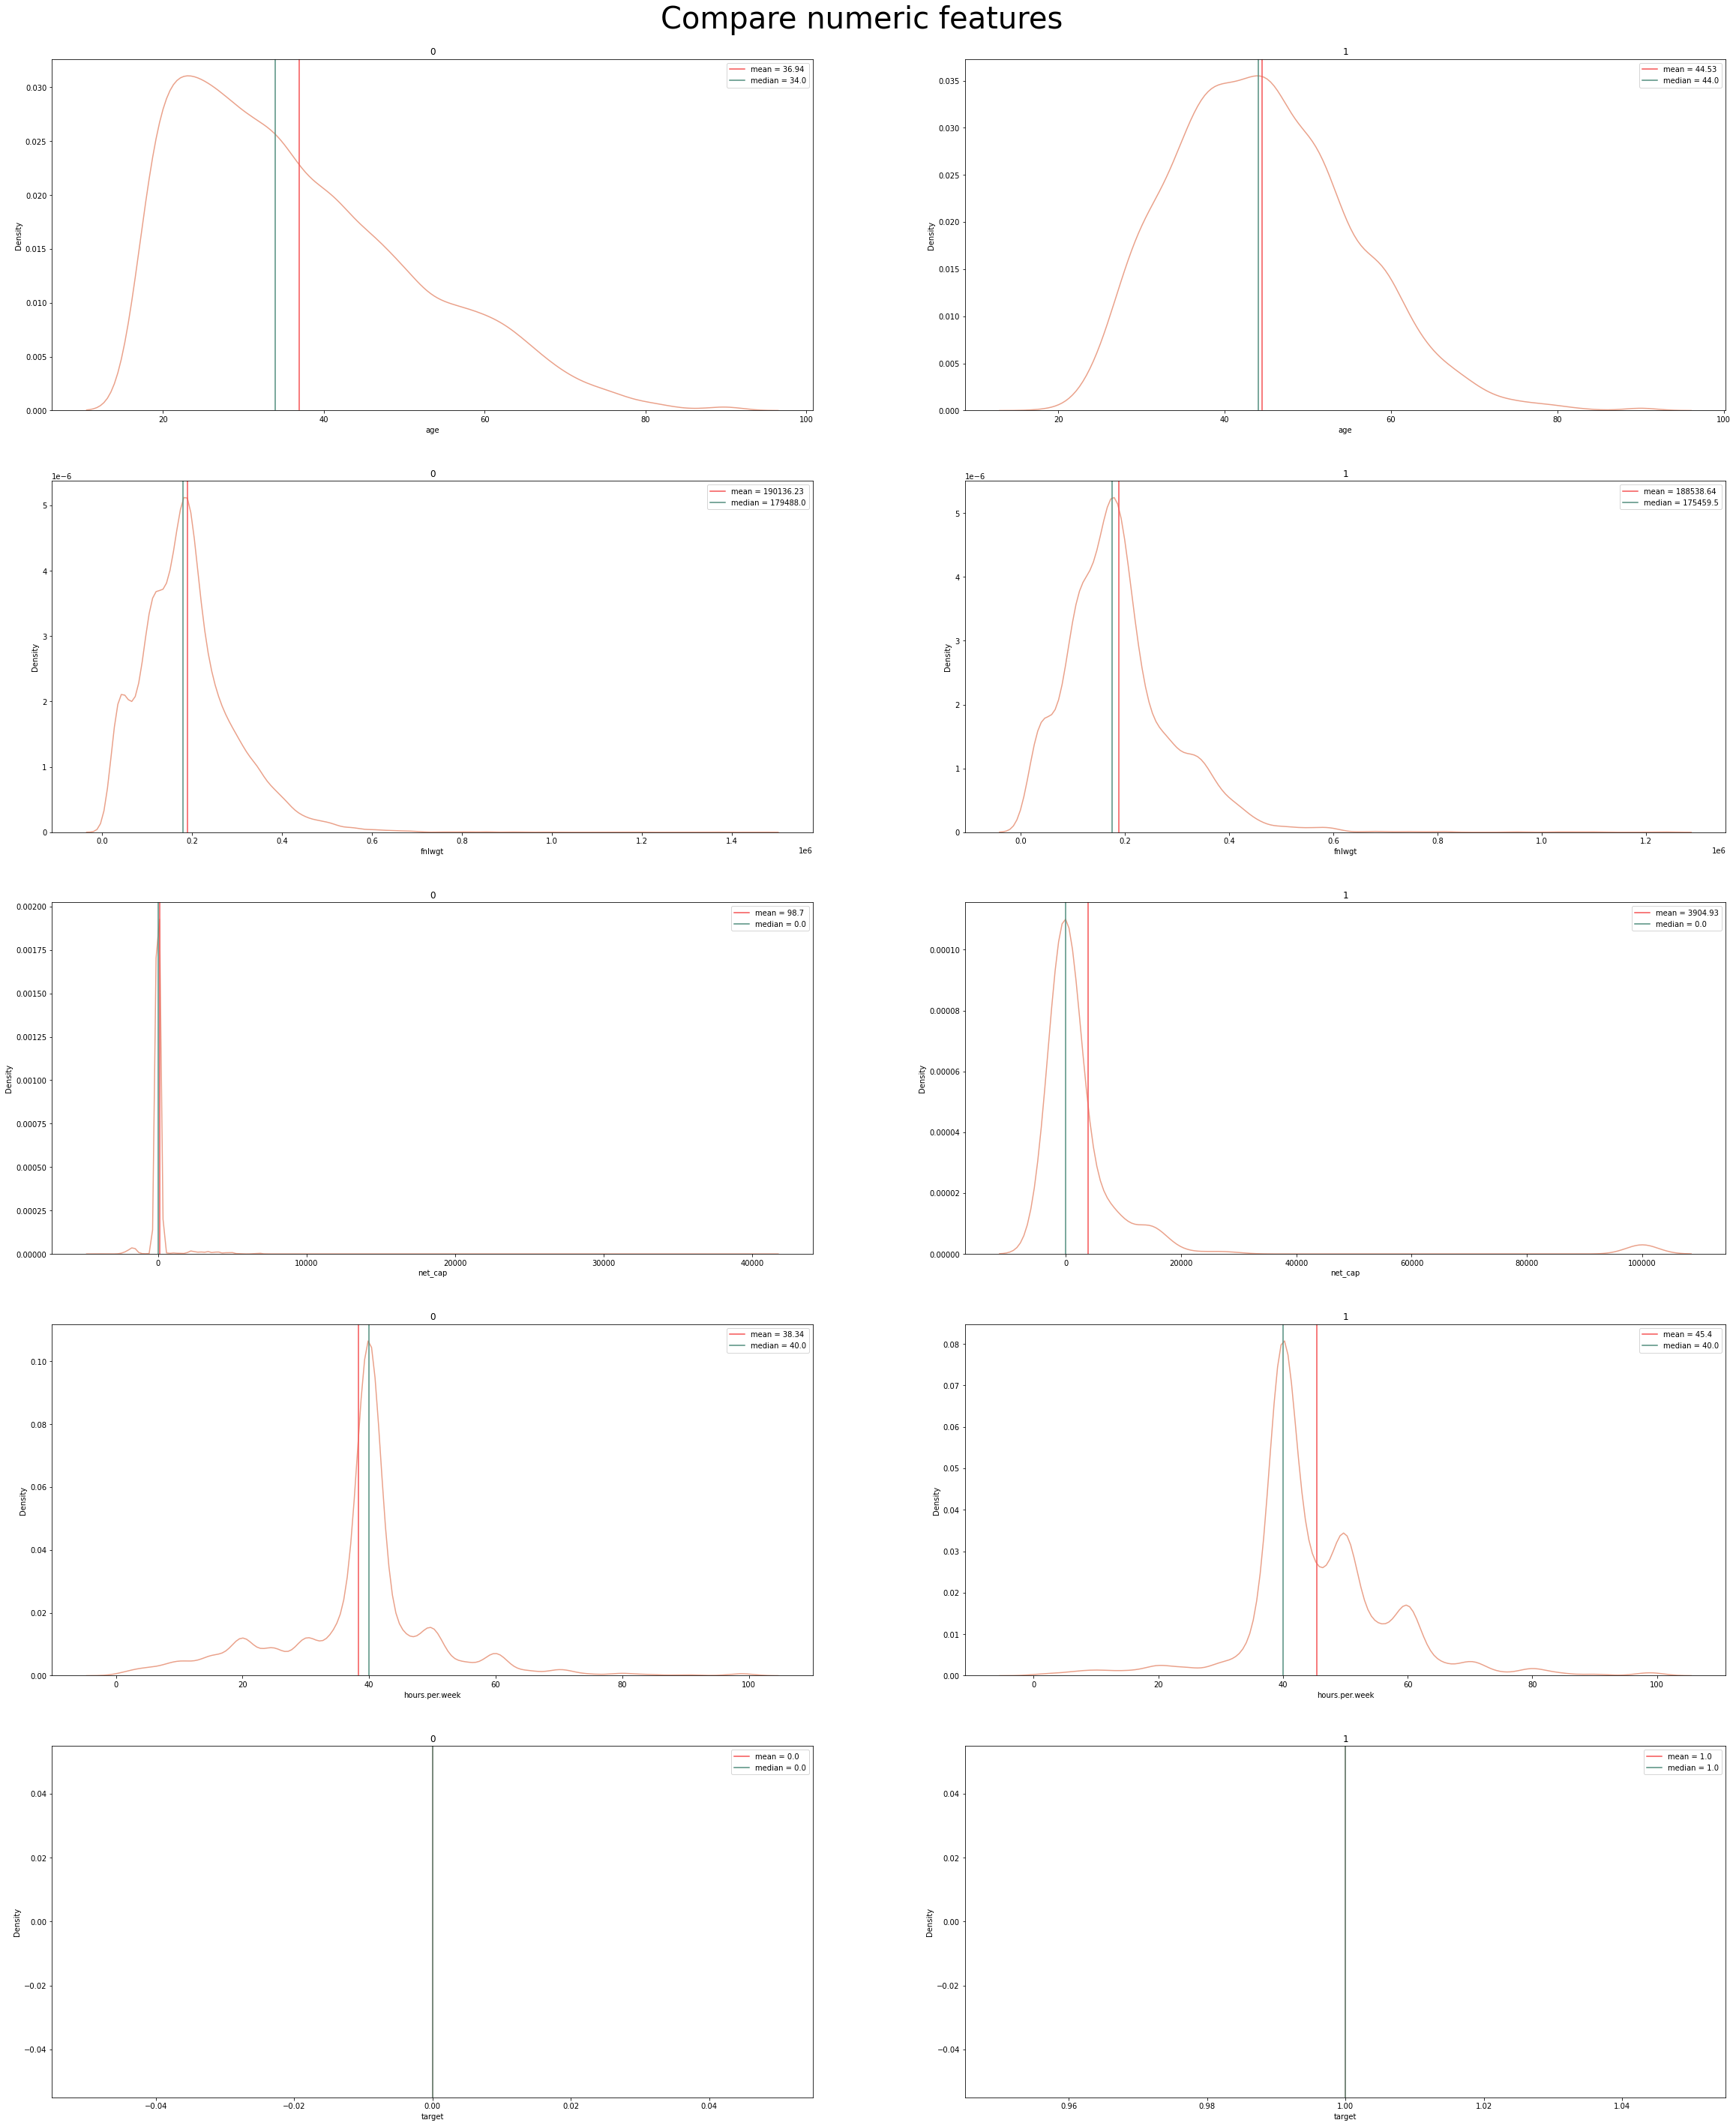

In [20]:
# Numerical data distribution
# Low income on the left, high income on the right
def visualize(axx, field, num):
    line = train_num[train_num['target'] == field] #메소드에서 target 클래스 추춣
    name = train_num[train_num['target'] == field][train_num.columns[num]].name #메소드에서 이름 추출
    sns.kdeplot(x = line[train_num.columns[num]],  data = train_num, ax = axx, color='#eaa18a') #countplot을 이용하여 그래프를 그려줍니다.
    axx.axvline(line.describe()[name]['mean'], c='#f55354', label = f"mean = {round(line.describe()[name]['mean'], 2)}") #mean 통계값을 표기해줍니다.
    axx.axvline(line.describe()[name]['50%'], c='#518d7d', label = f"median = {round(line.describe()[name]['50%'], 2)}") #median 통계값을 표기해줍니다.
    axx.legend()
    axx.set_title(field)

figure, ((ax1,ax2),(ax3,ax4), (ax5, ax6),(ax7, ax8), (ax9, ax10))  = plt.subplots(nrows=5, ncols=2) ##원하는 개수의 subplots 만들어주기
figure.set_size_inches(40, 50) #(w,h)
figure.suptitle('Compare numeric features', fontsize=40, y = 0.9)

k = 0 # number of features
j = 1 # number of graphs
while k<5:
    for i in range(0,2):
        visualize(eval(f'ax{j}'), train_num['target'].unique()[i], k)
        j = j+1
    k = k+1

|Column name|Analysis|
|:---|:---|
|Age| Low Income: Confirmed to be mainly distributed among people in their 20s and 40s<br>High income: Confirmed to be mainly distributed between the late 30s and 50s|
|fnlwgt|The distribution of weights is similar between low and high income, but I do not know exactly what the criteria for the weights are.|
|net_cap (cap.gain - cap.loss)|Low Income: A normal distribution graph with a very small variance with an average of 98.<br> High income: Average 3779, showing a wider distribution compared to low income|
|hours.per.week|High-income earners require relatively high hours of work per week.<br>In the case of low income, distribution is mainly based on 40 hours a week<br>In the case of high-income earners, it was confirmed that they form a certain cluster even after 40 hours or more.




# Data Preparation

### Find Outliers

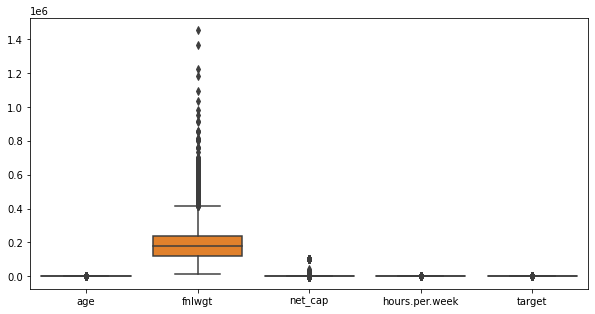

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_num)
plt.show()

##### - Some outliers exist for census weights and net capital gains.<br>- In the case of age and hours.per.week, the outliers are insignificant and have little effect.<br> -fnlwgt and Decided to remove only outliers in netcap

### Removing outliers

In [22]:
def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)

    return np.where((data > upper_bound)|(data < lower_bound))

In [23]:
print('Count before removal of outliers : ', len(train))
fnlwgt_ol_idx = outliers_iqr(train['fnlwgt'])[0]
net_cap_ol_idx = outliers_iqr(train['net_cap'])[0]

tt_ol_idx = np.concatenate((
    net_cap_ol_idx,
    fnlwgt_ol_idx,
), axis=None)

tt_no_ol_idx = []

for i in train.index:
    if i not in tt_ol_idx:
        tt_no_ol_idx.append(i)

train = train.loc[tt_no_ol_idx]
train = train.reset_index(drop=True)
print('count after removal of outliers : ', len(train))

Count before removal of outliers :  17480
count after removal of outliers :  14787


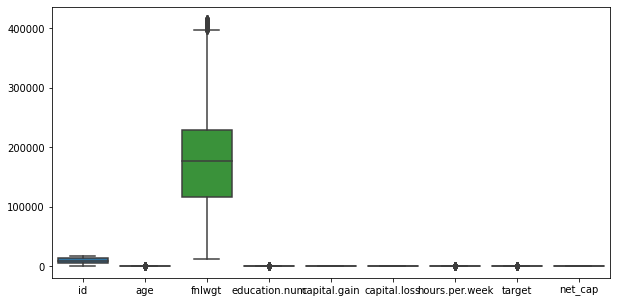

In [24]:
# # After removing outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=train)
plt.show()

##### - Outliers have been removed to some extent

### Encoding

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              14787 non-null  int64 
 1   age             14787 non-null  int64 
 2   workclass       13185 non-null  object
 3   fnlwgt          14787 non-null  int64 
 4   education       14787 non-null  object
 5   education.num   14787 non-null  int64 
 6   marital.status  14787 non-null  object
 7   occupation      13179 non-null  object
 8   relationship    14787 non-null  object
 9   race            14787 non-null  object
 10  sex             14787 non-null  object
 11  capital.gain    14787 non-null  int64 
 12  capital.loss    14787 non-null  int64 
 13  hours.per.week  14787 non-null  int64 
 14  native.country  14308 non-null  object
 15  target          14787 non-null  int64 
 16  net_cap         14787 non-null  int64 
dtypes: int64(9), object(8)
memory usage: 1.9+ MB


In [26]:
#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(train):
    label_maps = {}
    for col in train.columns:
        if train[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(train[col].unique()):
                label_map[key] = i  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    return label_maps

In [27]:
# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(train, label_map):
    for col in train.columns:
        if train[col].dtype=='object':
            train[col] = train[col].map(label_map[col])
    return train

In [28]:
train = label_encoder(train, make_label_map(train))

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              14787 non-null  int64
 1   age             14787 non-null  int64
 2   workclass       14787 non-null  int64
 3   fnlwgt          14787 non-null  int64
 4   education       14787 non-null  int64
 5   education.num   14787 non-null  int64
 6   marital.status  14787 non-null  int64
 7   occupation      14787 non-null  int64
 8   relationship    14787 non-null  int64
 9   race            14787 non-null  int64
 10  sex             14787 non-null  int64
 11  capital.gain    14787 non-null  int64
 12  capital.loss    14787 non-null  int64
 13  hours.per.week  14787 non-null  int64
 14  native.country  14787 non-null  int64
 15  target          14787 non-null  int64
 16  net_cap         14787 non-null  int64
dtypes: int64(17)
memory usage: 1.9 MB


### Scaling ( StandardScaler / MinMaxScaler / RobustScaler )

In [30]:
scaler_train =  train.drop(['target'], axis=1)

In [31]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
Stand_scale = scaler.fit_transform(scaler_train)

print("스케일 조정 전 feature Min value : \n ",format(scaler_train.min(axis=0)))
print("스케일 조정 전 feature Max value : \n ",format(scaler_train.max(axis=0)))
print()
print("스케일 조정 후 feature Min value : \n ",format(Stand_scale.min(axis=0)))
print("스케일 조정 후 feature Max value : \n ",format(Stand_scale.max(axis=0)))


스케일 조정 전 feature Min value : 
  id                    0
age                  17
workclass             0
fnlwgt            12285
education             0
education.num         1
marital.status        0
occupation            0
relationship          0
race                  0
sex                   0
capital.gain          0
capital.loss          0
hours.per.week        1
native.country        0
net_cap               0
dtype: int64
스케일 조정 전 feature Max value : 
  id                 17479
age                   90
workclass              8
fnlwgt            415913
education             15
education.num         16
marital.status         6
occupation            14
relationship           5
race                   4
sex                    1
capital.gain           0
capital.loss           0
hours.per.week        99
native.country        40
net_cap                0
dtype: int64

스케일 조정 후 feature Min value : 
  [-1.72868624 -1.50414086 -0.58978947 -1.9134446  -1.14187779 -3.48410633
 -0.80872457 -1.1923

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
MinMax_scale = scaler.fit_transform(scaler_train)

print("스케일 조정 전 feature Min value : \n ",format(scaler_train.min(axis=0)))
print("스케일 조정 전 feature Max value : \n ",format(scaler_train.max(axis=0)))
print()
print("스케일 조정 후 feature Min value : \n ",format(MinMax_scale.min(axis=0)))
print("스케일 조정 후 feature Max value : \n ",format(MinMax_scale.max(axis=0)))


스케일 조정 전 feature Min value : 
  id                    0
age                  17
workclass             0
fnlwgt            12285
education             0
education.num         1
marital.status        0
occupation            0
relationship          0
race                  0
sex                   0
capital.gain          0
capital.loss          0
hours.per.week        1
native.country        0
net_cap               0
dtype: int64
스케일 조정 전 feature Max value : 
  id                 17479
age                   90
workclass              8
fnlwgt            415913
education             15
education.num         16
marital.status         6
occupation            14
relationship           5
race                   4
sex                    1
capital.gain           0
capital.loss           0
hours.per.week        99
native.country        40
net_cap                0
dtype: int64

스케일 조정 후 feature Min value : 
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
스케일 조정 후 feature Max value : 
  [1. 1. 1. 1

In [33]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

Roubs_scale = scaler.fit_transform(scaler_train)

print("스케일 조정 전 feature Min value : \n ",format(scaler_train.min(axis=0)))
print("스케일 조정 전 feature Max value : \n ",format(scaler_train.max(axis=0)))
print()
print("스케일 조정 후 feature Min value : \n ",format(Roubs_scale.min(axis=0)))
print("스케일 조정 후 feature Max value : \n ",format(Roubs_scale.max(axis=0)))


스케일 조정 전 feature Min value : 
  id                    0
age                  17
workclass             0
fnlwgt            12285
education             0
education.num         1
marital.status        0
occupation            0
relationship          0
race                  0
sex                   0
capital.gain          0
capital.loss          0
hours.per.week        1
native.country        0
net_cap               0
dtype: int64
스케일 조정 전 feature Max value : 
  id                 17479
age                   90
workclass              8
fnlwgt            415913
education             15
education.num         16
marital.status         6
occupation            14
relationship           5
race                   4
sex                    1
capital.gain           0
capital.loss           0
hours.per.week        99
native.country        40
net_cap                0
dtype: int64

스케일 조정 후 feature Min value : 
  [-0.99703501 -0.95        0.         -1.45993753 -1.         -3.
 -1.         -0.8        -0.

In [34]:
Stand_scale =  pd.DataFrame( data = Stand_scale, columns = ['id', 'age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'net_cap'] )

In [35]:
MinMax_scale = pd.DataFrame( data = MinMax_scale, columns = ['id', 'age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'net_cap'] )

In [36]:
Roubs_scale = pd.DataFrame( data = Roubs_scale, columns = ['id', 'age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'net_cap'] )


# Analysis Algorithms( Logistic Regression / Desion Tree / KNN / K-Means)

## LogisticRegression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

In [38]:

def auto_Logistic(data,train,size):
    X = data.drop(['id'], axis=1)
    y = train['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = size,  shuffle=True , random_state=99, stratify = y)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_test,y_test)
    print("score : {}".format(score))


    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

    MSE = mean_squared_error(y_pred,y_test)
    print("MSE : {}".format(MSE))
    print("RMSE : {}".format(np.sqrt(MSE)))
    print("MAE : {}".format(mean_absolute_error(y_test, y_pred)))
    print("MAPE : {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))
    print("MPE : {}".format(np.mean((y_test - y_pred) / y_test) * 100))



score : 0.8187964841108857
MSE : 0.18120351588911426
RMSE : 0.42568006282784054
MAE : 0.18120351588911426
MAPE : inf
MPE : -inf


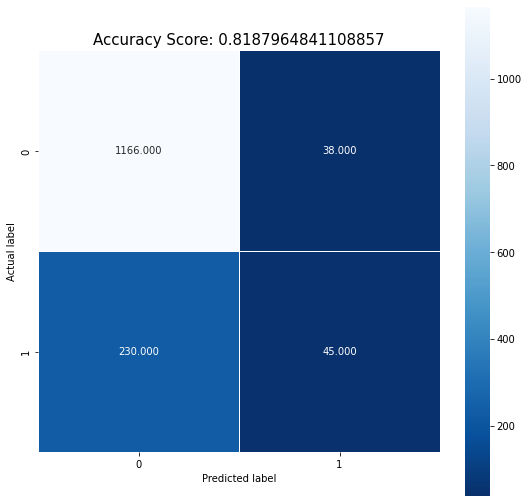

In [39]:
auto_Logistic(train,train,0.1)

score : 0.8125507167974033
MSE : 0.1874492832025967
RMSE : 0.4329541352182662
MAE : 0.1874492832025967
MAPE : inf
MPE : -inf


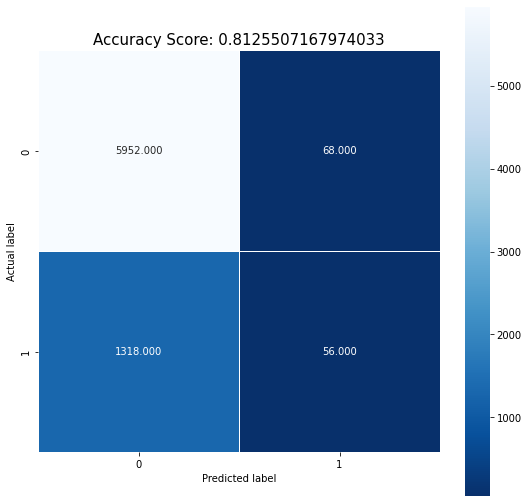

In [40]:
auto_Logistic(train,train,0.5)

score : 0.8142011834319527
MSE : 0.18579881656804734
RMSE : 0.43104386849605847
MAE : 0.18579881656804734
MAPE : 100.0
MPE : 100.0


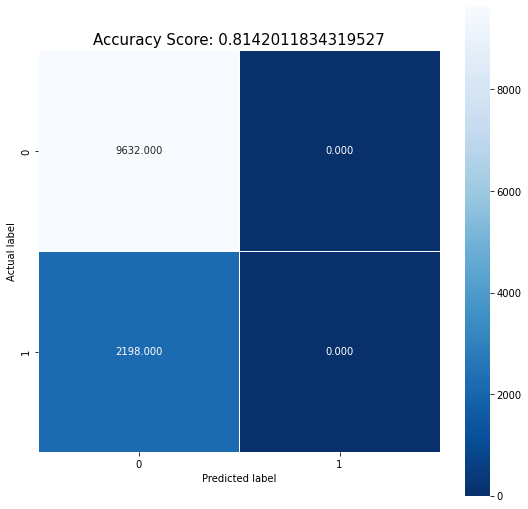

In [41]:
auto_Logistic(train,train,0.8)

score : 0.8444895199459094
MSE : 0.1555104800540906
RMSE : 0.39434817110529446
MAE : 0.1555104800540906
MAPE : inf
MPE : -inf


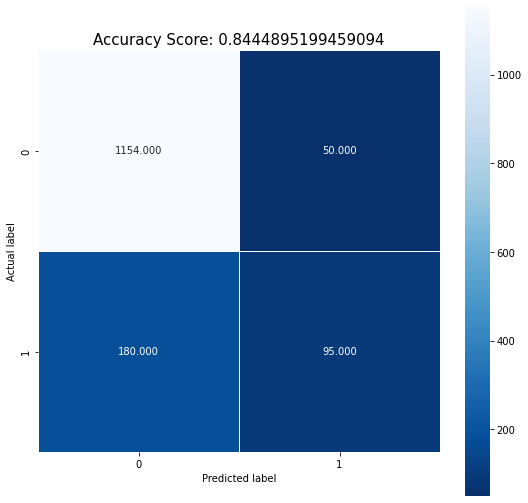

In [42]:
auto_Logistic(Stand_scale,train,0.1)

score : 0.8425750608601569
MSE : 0.15742493913984312
RMSE : 0.39676811759495384
MAE : 0.15742493913984312
MAPE : inf
MPE : -inf


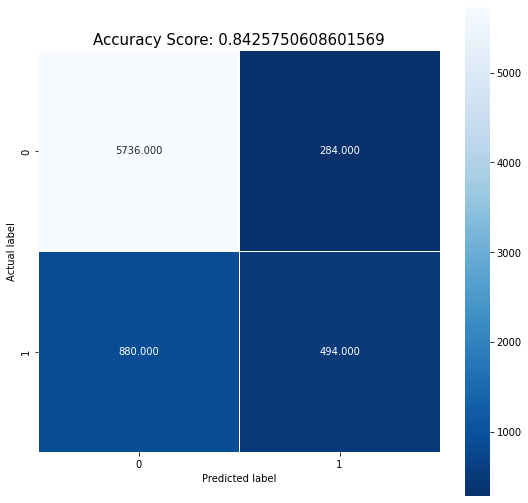

In [43]:
auto_Logistic(Stand_scale,train,0.5)

score : 0.8420118343195266
MSE : 0.15798816568047339
RMSE : 0.3974772517773481
MAE : 0.15798816568047339
MAPE : inf
MPE : -inf


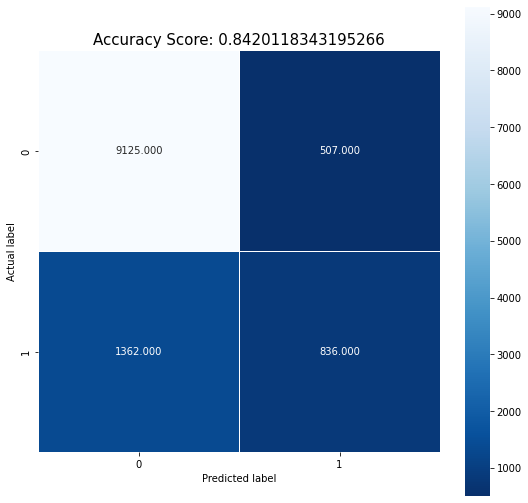

In [44]:
auto_Logistic(Stand_scale,train,0.8)

score : 0.8471940500338067
MSE : 0.15280594996619337
RMSE : 0.39090401630859894
MAE : 0.15280594996619337
MAPE : inf
MPE : -inf


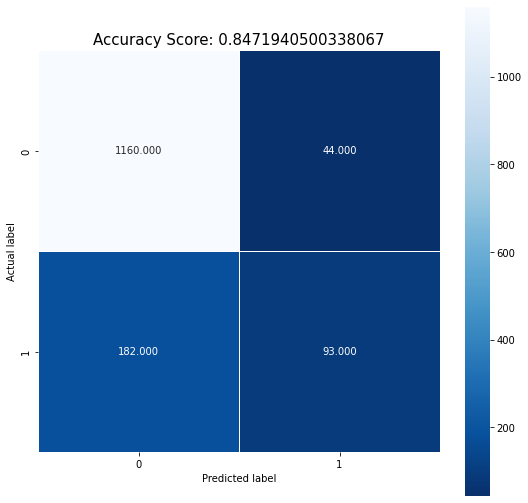

In [45]:
auto_Logistic(MinMax_scale,train,0.1)

score : 0.8427103056532323
MSE : 0.15728969434676765
RMSE : 0.39659764793398317
MAE : 0.15728969434676765
MAPE : inf
MPE : -inf


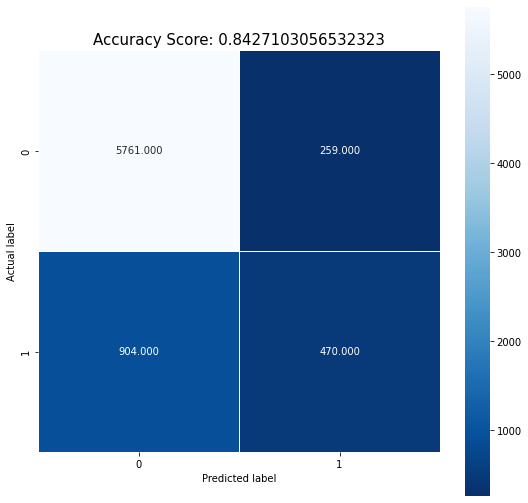

In [46]:
auto_Logistic(MinMax_scale,train,0.5)

score : 0.8421808960270498
MSE : 0.15781910397295013
RMSE : 0.39726452644673693
MAE : 0.15781910397295013
MAPE : inf
MPE : -inf


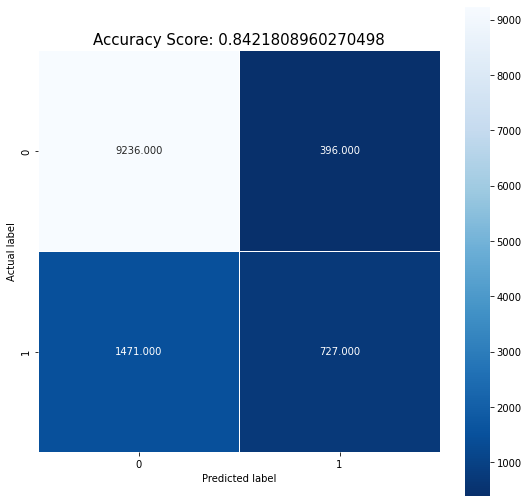

In [47]:
auto_Logistic(MinMax_scale,train,0.8)

score : 0.8444895199459094
MSE : 0.1555104800540906
RMSE : 0.39434817110529446
MAE : 0.1555104800540906
MAPE : inf
MPE : -inf


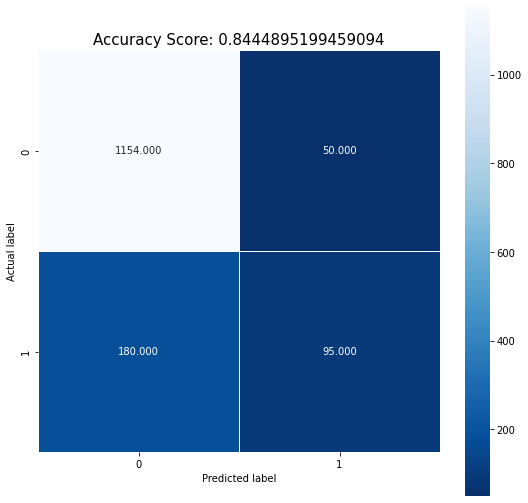

In [48]:
auto_Logistic(Roubs_scale,train,0.1)

score : 0.8424398160670814
MSE : 0.1575601839329186
RMSE : 0.39693851404583885
MAE : 0.1575601839329186
MAPE : inf
MPE : -inf


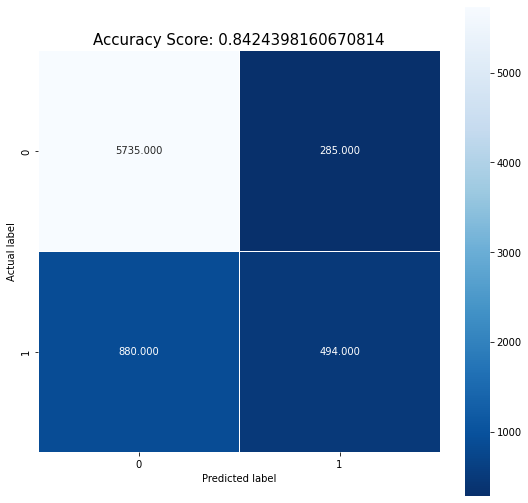

In [49]:
auto_Logistic(Roubs_scale,train,0.5)

score : 0.8421808960270498
MSE : 0.15781910397295013
RMSE : 0.39726452644673693
MAE : 0.15781910397295013
MAPE : inf
MPE : -inf


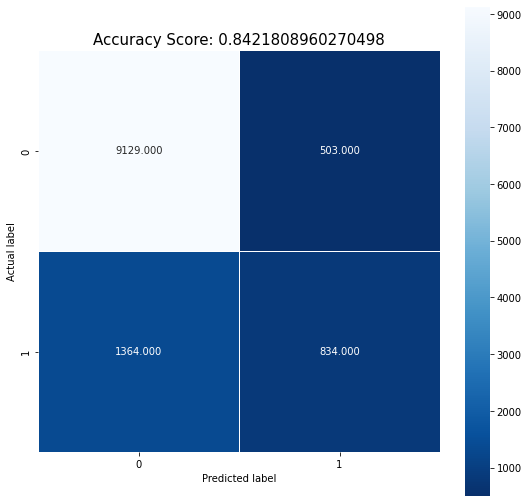

In [50]:
auto_Logistic(Roubs_scale,train,0.8)

## Decision tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import  GridSearchCV

#Decision tree
def auto_tree(model,train,size):
    
    feature = model.drop(['id'], axis=1)
    target = train['target']
    X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size= size, shuffle=True)

    dtc = DecisionTreeClassifier(random_state=156)
    dtc = dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    score = dtc.score(X_test,y_test)

    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);
    
    # K-Fold
    scores = cross_val_score(dtc,feature,target,cv=5)

    # GridSearchCV
    
    parameters = { 'max_depth' : [3,5,7],
                   'min_samples_split': [3, 5],
                   'splitter': ['best', 'random']}
    
    grid_dt = GridSearchCV(dtc,param_grid = parameters, cv=5)
    grid_dt.fit(X_train,y_train)
    

    print('Accuracy : ',score)
    print('Cross validation  : ',scores)
    print('Cross validation mean : ',scores.mean())
    print(grid_dt.best_params_)

Accuracy :  0.7991886409736308
Cross validation  :  [0.79546991 0.79546991 0.7822117  0.79844437 0.74940818]
Cross validation mean :  0.7842008157034694
{'max_depth': 7, 'min_samples_split': 5, 'splitter': 'best'}


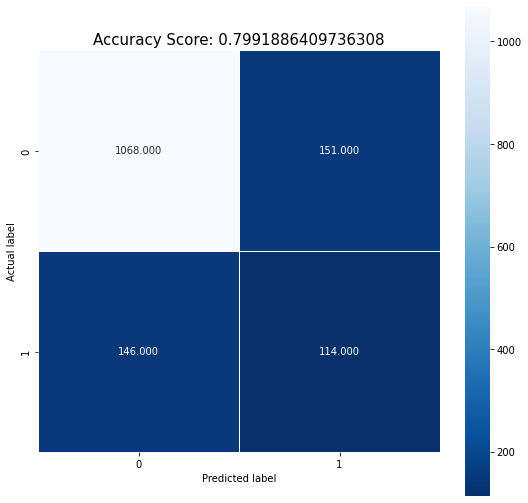

In [52]:
auto_tree(Stand_scale,train,0.1)

Accuracy :  0.7995672166621585
Cross validation  :  [0.79546991 0.79546991 0.7822117  0.79844437 0.74940818]
Cross validation mean :  0.7842008157034694
{'max_depth': 5, 'min_samples_split': 3, 'splitter': 'best'}


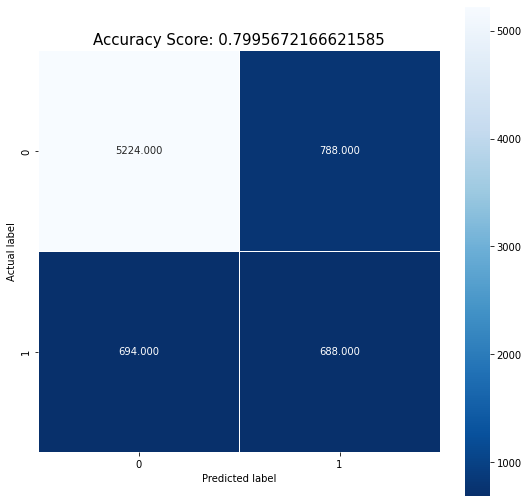

In [53]:
auto_tree(Stand_scale,train,0.5)

Accuracy :  0.7943364327979713
Cross validation  :  [0.79546991 0.79546991 0.7822117  0.79844437 0.74940818]
Cross validation mean :  0.7842008157034694
{'max_depth': 5, 'min_samples_split': 3, 'splitter': 'random'}


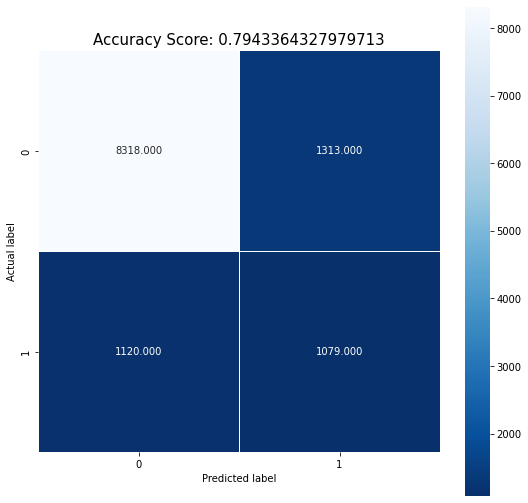

In [54]:
auto_tree(Stand_scale,train,0.8)

Accuracy :  0.7991886409736308
Cross validation  :  [0.79546991 0.79479378 0.7822117  0.79810619 0.74940818]
Cross validation mean :  0.7839979530813878
{'max_depth': 3, 'min_samples_split': 3, 'splitter': 'best'}


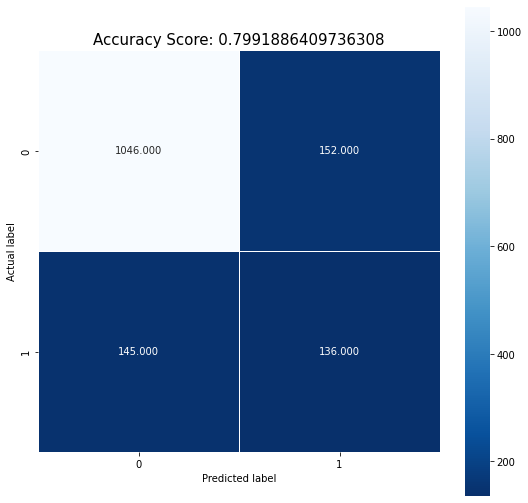

In [55]:
auto_tree(MinMax_scale,train,0.1)

Accuracy :  0.7978090343521774
Cross validation  :  [0.79546991 0.79479378 0.7822117  0.79810619 0.74940818]
Cross validation mean :  0.7839979530813878
{'max_depth': 5, 'min_samples_split': 5, 'splitter': 'random'}


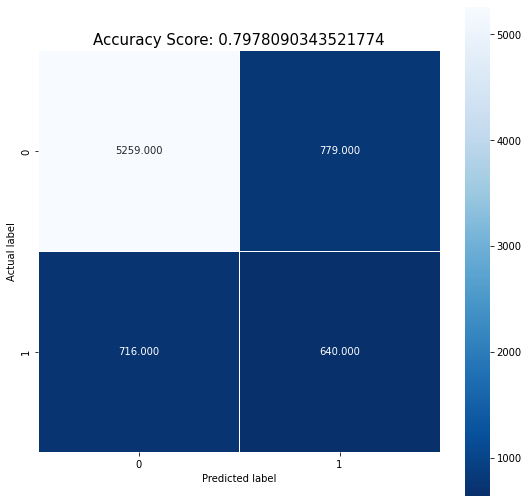

In [56]:
auto_tree(MinMax_scale,train,0.5)

Accuracy :  0.790363482671175
Cross validation  :  [0.79546991 0.79479378 0.7822117  0.79810619 0.74940818]
Cross validation mean :  0.7839979530813878
{'max_depth': 5, 'min_samples_split': 5, 'splitter': 'random'}


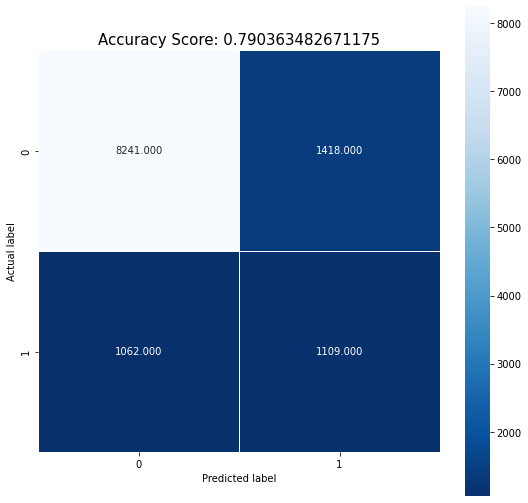

In [57]:
auto_tree(MinMax_scale,train,0.8)

Accuracy :  0.8120351588911426
Cross validation  :  [0.79682218 0.79546991 0.78288806 0.79945891 0.74974636]
Cross validation mean :  0.7848770854183801
{'max_depth': 7, 'min_samples_split': 5, 'splitter': 'random'}


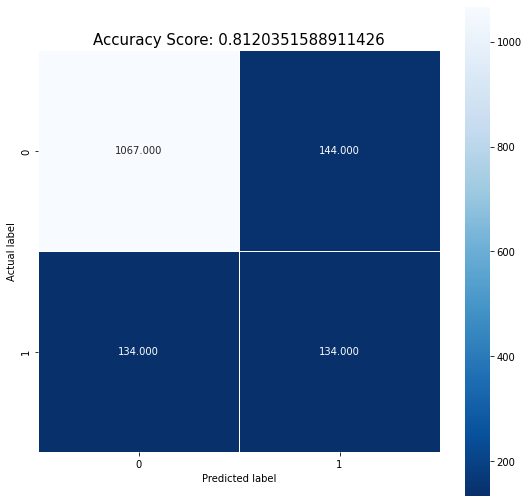

In [58]:
auto_tree(Roubs_scale,train,0.1)

Accuracy :  0.7893847194050034
Cross validation  :  [0.79682218 0.79546991 0.78288806 0.79945891 0.74974636]
Cross validation mean :  0.7848770854183801
{'max_depth': 5, 'min_samples_split': 3, 'splitter': 'best'}


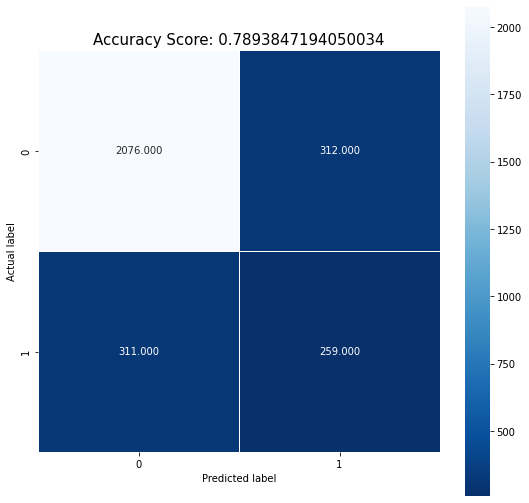

In [59]:
auto_tree(Roubs_scale,train,0.2)

Accuracy :  0.8007607776838546
Cross validation  :  [0.79682218 0.79546991 0.78288806 0.79945891 0.74974636]
Cross validation mean :  0.7848770854183801
{'max_depth': 3, 'min_samples_split': 3, 'splitter': 'best'}


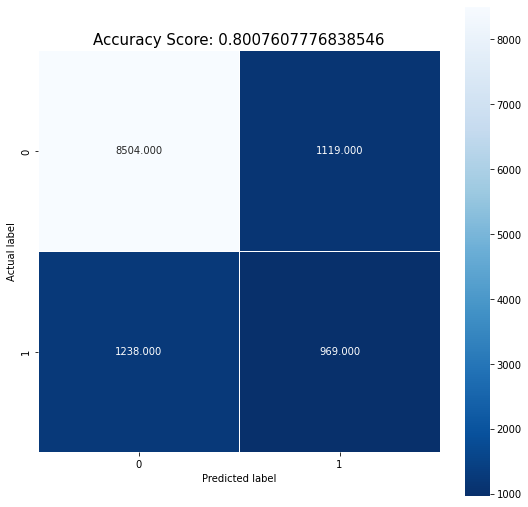

In [60]:
auto_tree(Roubs_scale,train,0.8)

##   KNN

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def auto_KNN(data,train,size):

    X = data.drop(['id'], axis=1)
    y = train['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42,stratify =y)
    
    #k=3
    knn_cv = KNeighborsClassifier(n_neighbors = 3)
    knn_cv.fit(X_train,y_train)
    cv_scores = cross_val_score(knn_cv, X_test, y_test, cv=5)

    print('k=3')
    print(cv_scores)
    print('cv_scores mean: {}'.format(np.mean(cv_scores)))

    #k=5
    knn_cv = KNeighborsClassifier(n_neighbors = 5)
    knn_cv.fit(X_train,y_train)
    cv_scores = cross_val_score(knn_cv, X_test, y_test, cv=5)

    print('k=5')
    print(cv_scores)
    print('cv_scores mean: {}'.format(np.mean(cv_scores)))

    # GridSearch
    knn2 = KNeighborsClassifier()
    param_grid = {'n_neighbors': np.arange(1, 15)}
    knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
    knn_gscv.fit(X, y)
    print('Best parameter : ',knn_gscv.best_params_)
    print('Best Score : ', knn_gscv.best_score_)





In [62]:
auto_KNN(Stand_scale,train,0.1)

k=3
[0.81081081 0.83108108 0.84797297 0.81756757 0.81694915]
cv_scores mean: 0.824876316994961
k=5
[0.8277027  0.83108108 0.83108108 0.83108108 0.84067797]
cv_scores mean: 0.8323247824095281
Best parameter :  {'n_neighbors': 12}
Best Score :  0.8420229967373233


In [63]:
auto_KNN(Stand_scale,train,0.5)

k=3
[0.81947262 0.83502366 0.81609195 0.83231913 0.83355886]
cv_scores mean: 0.8272932466346624
k=5
[0.82893847 0.84246112 0.82488168 0.84313725 0.8308525 ]
cv_scores mean: 0.8340542058828104
Best parameter :  {'n_neighbors': 12}
Best Score :  0.8420229967373233


In [64]:
auto_KNN(Stand_scale,train,0.8)

k=3
[0.8262891  0.82502113 0.83262891 0.83558749 0.82586644]
cv_scores mean: 0.8290786136939984
k=5
[0.83305156 0.82924768 0.82797971 0.84023669 0.82333052]
cv_scores mean: 0.8307692307692307
Best parameter :  {'n_neighbors': 12}
Best Score :  0.8420229967373233


In [65]:
auto_KNN(MinMax_scale,train,0.1)

k=3
[0.7972973  0.81081081 0.83445946 0.82094595 0.81355932]
cv_scores mean: 0.8154145671094823
k=5
[0.80743243 0.83783784 0.84121622 0.81756757 0.83050847]
cv_scores mean: 0.826912505726065
Best parameter :  {'n_neighbors': 14}
Best Score :  0.8361386316330786


In [66]:
auto_KNN(MinMax_scale,train,0.5)

k=3
[0.81135903 0.83029074 0.82758621 0.82758621 0.83152909]
cv_scores mean: 0.8256702541032277
k=5
[0.82352941 0.8356998  0.8296146  0.83637593 0.83288227]
cv_scores mean: 0.8316204032823992
Best parameter :  {'n_neighbors': 14}
Best Score :  0.8361386316330786


In [67]:
auto_KNN(MinMax_scale,train,0.8)

k=3
[0.82375317 0.82375317 0.8317836  0.8271344  0.82079459]
cv_scores mean: 0.8254437869822485
k=5
[0.83770076 0.83136095 0.83389687 0.83981403 0.82671175]
cv_scores mean: 0.8338968723584109
Best parameter :  {'n_neighbors': 14}
Best Score :  0.8361386316330786


In [68]:
auto_KNN(Roubs_scale,train,0.1)

k=3
[0.81418919 0.80067568 0.83445946 0.81756757 0.79661017]
cv_scores mean: 0.8127004122766834
k=5
[0.8277027  0.83108108 0.83108108 0.84459459 0.82033898]
cv_scores mean: 0.8309596885020614
Best parameter :  {'n_neighbors': 14}
Best Score :  0.8383036962292293


In [69]:
auto_KNN(Roubs_scale,train,0.5)

k=3
[0.81947262 0.83434753 0.81879648 0.83096687 0.82882273]
cv_scores mean: 0.8264812471580019
k=5
[0.82488168 0.84448952 0.82893847 0.82623394 0.82814614]
cv_scores mean: 0.8305379507969489
Best parameter :  {'n_neighbors': 14}
Best Score :  0.8383036962292293


In [70]:
auto_KNN(Roubs_scale,train,0.8)

k=3
[0.81910397 0.82037194 0.83305156 0.83601014 0.81910397]
cv_scores mean: 0.8255283178360102
k=5
[0.83305156 0.83009298 0.82586644 0.84361792 0.83262891]
cv_scores mean: 0.8330515638207945
Best parameter :  {'n_neighbors': 14}
Best Score :  0.8383036962292293


## K-Means

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              14787 non-null  int64
 1   age             14787 non-null  int64
 2   workclass       14787 non-null  int64
 3   fnlwgt          14787 non-null  int64
 4   education       14787 non-null  int64
 5   education.num   14787 non-null  int64
 6   marital.status  14787 non-null  int64
 7   occupation      14787 non-null  int64
 8   relationship    14787 non-null  int64
 9   race            14787 non-null  int64
 10  sex             14787 non-null  int64
 11  capital.gain    14787 non-null  int64
 12  capital.loss    14787 non-null  int64
 13  hours.per.week  14787 non-null  int64
 14  native.country  14787 non-null  int64
 15  target          14787 non-null  int64
 16  net_cap         14787 non-null  int64
dtypes: int64(17)
memory usage: 1.9 MB


In [72]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [73]:
X = train.drop(['id', 'target'], axis=1)
y = train['target']
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

             Specs         Score
2           fnlwgt  35512.095786
0              age   3330.317559
12  hours.per.week   2880.406717
5   marital.status   1655.175087
7     relationship   1098.173983
6       occupation   1027.187885
4    education.num    828.351303
9              sex    391.423052
8             race    125.097972
13  native.country     22.332604


In [74]:
from sklearn.ensemble import ExtraTreesClassifier

[0.1880313  0.04923876 0.18573236 0.04117585 0.09529083 0.07339673
 0.09706365 0.07990436 0.01977587 0.02780546 0.         0.
 0.12005289 0.02253193 0.        ]


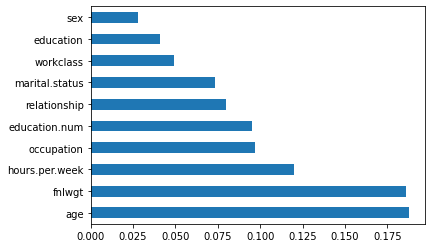

In [75]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

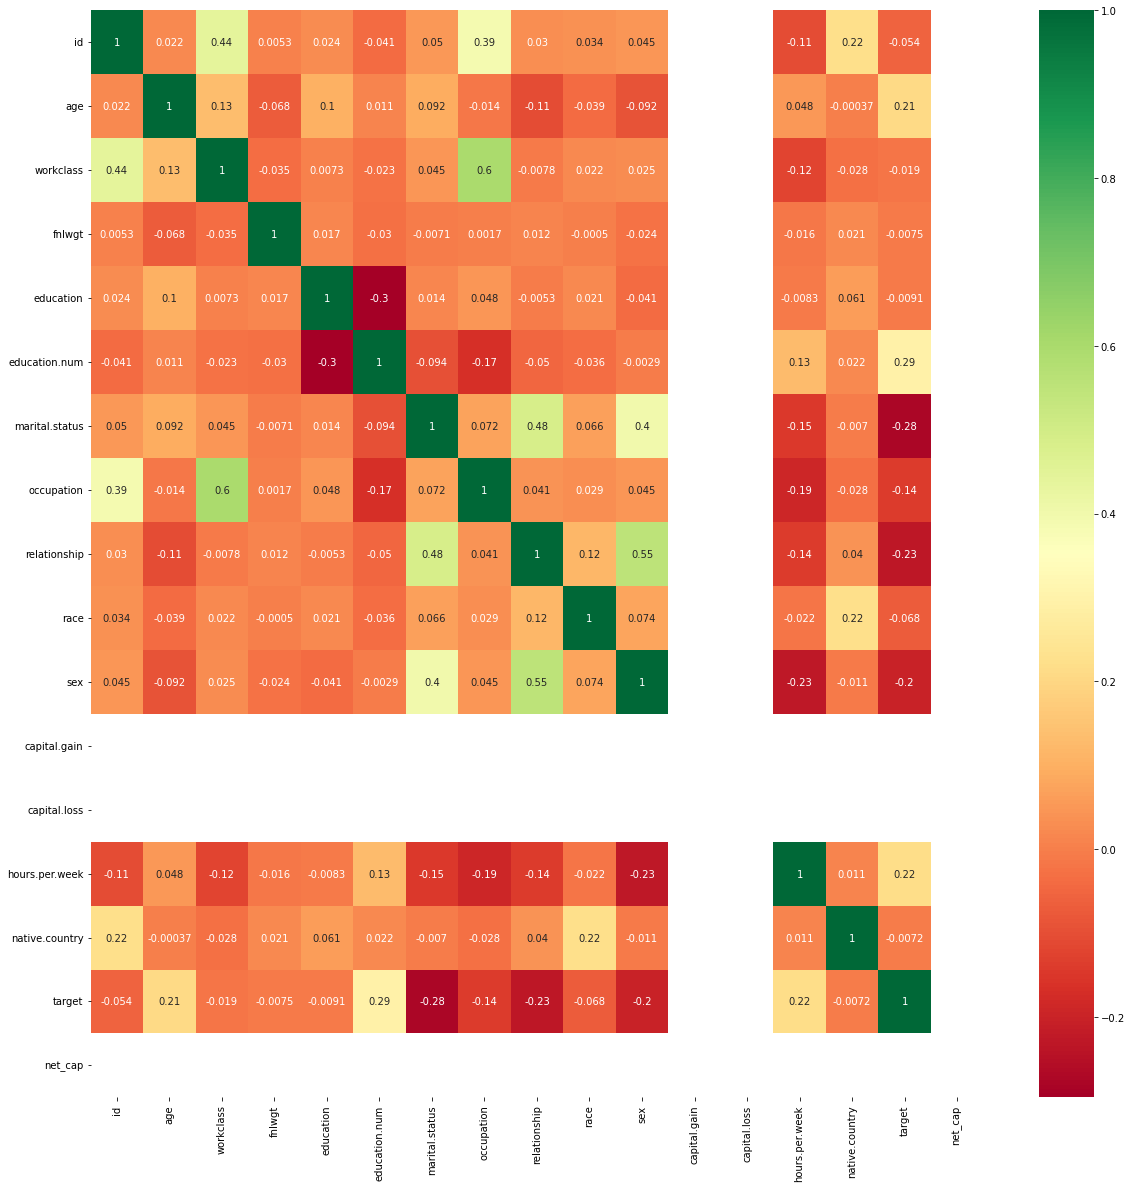

In [76]:
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### K-Means

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              14787 non-null  int64
 1   age             14787 non-null  int64
 2   workclass       14787 non-null  int64
 3   fnlwgt          14787 non-null  int64
 4   education       14787 non-null  int64
 5   education.num   14787 non-null  int64
 6   marital.status  14787 non-null  int64
 7   occupation      14787 non-null  int64
 8   relationship    14787 non-null  int64
 9   race            14787 non-null  int64
 10  sex             14787 non-null  int64
 11  capital.gain    14787 non-null  int64
 12  capital.loss    14787 non-null  int64
 13  hours.per.week  14787 non-null  int64
 14  native.country  14787 non-null  int64
 15  target          14787 non-null  int64
 16  net_cap         14787 non-null  int64
dtypes: int64(17)
memory usage: 1.9 MB


In [78]:
from sklearn.cluster import KMeans
def auto_KMeans(A, B):
    x = train[[A, B]].values
    y = train['target'].values
    distortions = []
    for i in range(1,17):
        kmeans_plus = KMeans(n_clusters=i, init = 'k-means++', n_init = 17)
        kmeans_plus.fit(x)
        distortions.append(kmeans_plus.inertia_)
    plt.plot(range(1,17), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortions')
    plt.tight_layout()
    plt.show()
    print('왜곡 : %2.f' % kmeans_plus.inertia_)
    km = KMeans(
        n_clusters=3, init='random',
        n_init=10, max_iter=300, 
        tol=1e-04, random_state=0 )
    y_km = km.fit_predict(x)
    plt.scatter(
        x[y_km == 0, 0], x[y_km == 0, 1],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='cluster 1' )

    plt.scatter(
        x[y_km == 1, 0], x[y_km == 1, 1],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='cluster 2' )

    plt.scatter(
        x[y_km == 2, 0], x[y_km == 2, 1],
        s=50, c='lightblue',
        marker='v', edgecolor='black',
        label='cluster 3' )

    # plot the centroids
    plt.scatter(
        km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='centroids' )
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

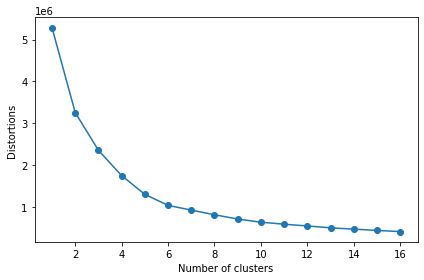

왜곡 : 408269


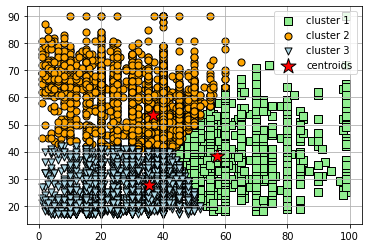

In [79]:
auto_KMeans('hours.per.week', 'age')

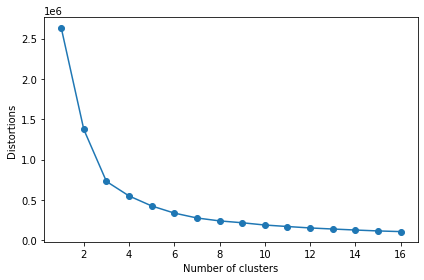

왜곡 : 107142


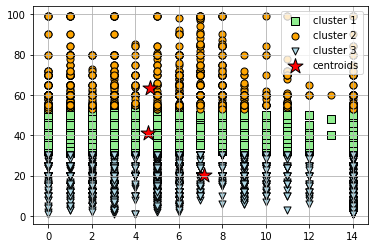

In [80]:
auto_KMeans('occupation', 'hours.per.week')

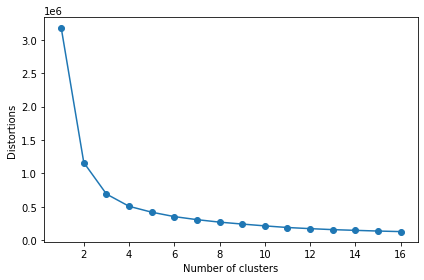

왜곡 : 128250


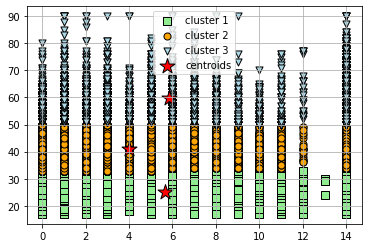

In [81]:
auto_KMeans('occupation', 'age')

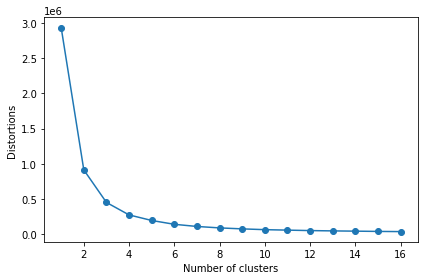

왜곡 : 38095


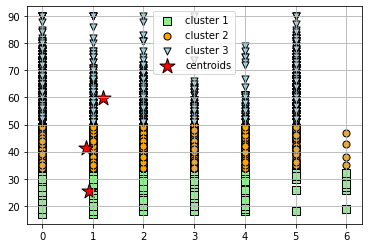

In [82]:
auto_KMeans('marital.status', 'age')

# Evaluation

### K-fold cross

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate

### StratifiedKFold (LogisticRegression)

In [84]:
def SKFold(data, k):
    X = data.drop(['id'], axis=1)
    y = train['target']
    
    model = LogisticRegression()
    skfold = StratifiedKFold(n_splits=k, shuffle = True, random_state=42) 
    scores = cross_val_score(model, X, y, cv=k)
    print(scores)

In [85]:
SKFold(Stand_scale,12)

[0.837794   0.83049473 0.85644769 0.83766234 0.83279221 0.83441558
 0.8400974  0.83928571 0.84577922 0.84659091 0.85146104 0.83685065]


In [86]:
SKFold(MinMax_scale,14)

[0.83254494 0.83349101 0.8448439  0.84848485 0.84375    0.82765152
 0.83143939 0.84848485 0.84185606 0.83712121 0.84469697 0.84659091
 0.85606061 0.83712121]


In [87]:
SKFold(Roubs_scale,12)

[0.83698297 0.83049473 0.85644769 0.83766234 0.83279221 0.83441558
 0.8400974  0.83847403 0.84577922 0.84659091 0.85146104 0.83685065]


### Decision tree KFold

In [92]:
def DKFold(data, k):
    X = data.drop(['id'], axis=1)
    y = train['target']
  
    dtc = DecisionTreeClassifier(random_state=156)
    scores = cross_val_score(dtc, X, y, scoring='accuracy', cv=k)
    print('Scores:', np.round(scores,4))
    print('Mean Scores:', np.round(np.mean(scores)))


In [93]:
DKFold(Stand_scale,12)

Scores: [0.7956 0.7964 0.7883 0.7987 0.8019 0.7849 0.7906 0.8028 0.7881 0.8117
 0.7744 0.7808]
Mean Scores: 1.0


In [94]:
DKFold(MinMax_scale,14)

Scores: [0.8089 0.7843 0.7843 0.7973 0.7936 0.7803 0.7784 0.7917 0.803  0.7718
 0.8049 0.7955 0.7907 0.7869]
Mean Scores: 1.0


In [95]:
DKFold(Roubs_scale,12)

Scores: [0.7981 0.7972 0.7899 0.7963 0.8028 0.7914 0.7914 0.8036 0.7881 0.8084
 0.7752 0.7808]
Mean Scores: 1.0
